In [1]:
import torch
from vision_models_playground.predictors.yolo_predictor import YoloV1Predictor
from vision_models_playground.datasets.datasets import get_voc_detection_dataset_yolo, get_voc_detection_dataset_raw
from vision_models_playground.utility.load_models import load_best_model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = load_best_model("../models/train/ResNetYoloV1/2023-07-06_14-37-23")
class_map = get_voc_detection_dataset_yolo(root='../data')[0].class_map
predictor = YoloV1Predictor(model, threshold=0.2, class_map=class_map, device=device, max_overlap=0.3)
voc_test = get_voc_detection_dataset_raw(root='../data')[1]

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/akriel/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 66.1MB/s]


In [2]:
class_map

{'aeroplane': 0,
 'bicycle': 1,
 'bird': 2,
 'boat': 3,
 'bottle': 4,
 'bus': 5,
 'car': 6,
 'cat': 7,
 'chair': 8,
 'cow': 9,
 'diningtable': 10,
 'dog': 11,
 'horse': 12,
 'motorbike': 13,
 'person': 14,
 'pottedplant': 15,
 'sheep': 16,
 'sofa': 17,
 'train': 18,
 'tvmonitor': 19}

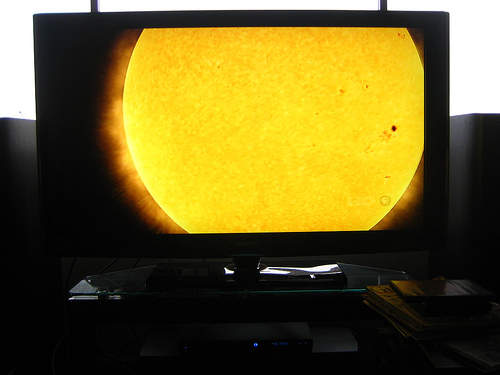

In [3]:
image = voc_test[0][0]
image

In [4]:
predicted = predictor.predict(image)
predicted

[{'objects': [{'class_id': 19,
    'class_name': 'tvmonitor',
    'confidence': 0.20941084623336792,
    'x_min': 87,
    'y_min': 17,
    'x_max': 433,
    'y_max': 233,
    'overlap': 0.0,
    'area': 74736}],
  'image': <PIL.Image.Image image mode=RGB size=500x375>}]

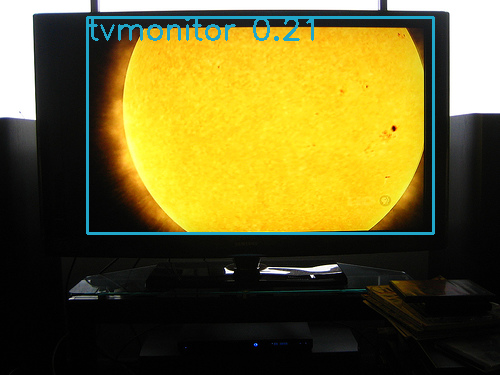

In [5]:
image_edited = predicted[0]['image']
image_edited

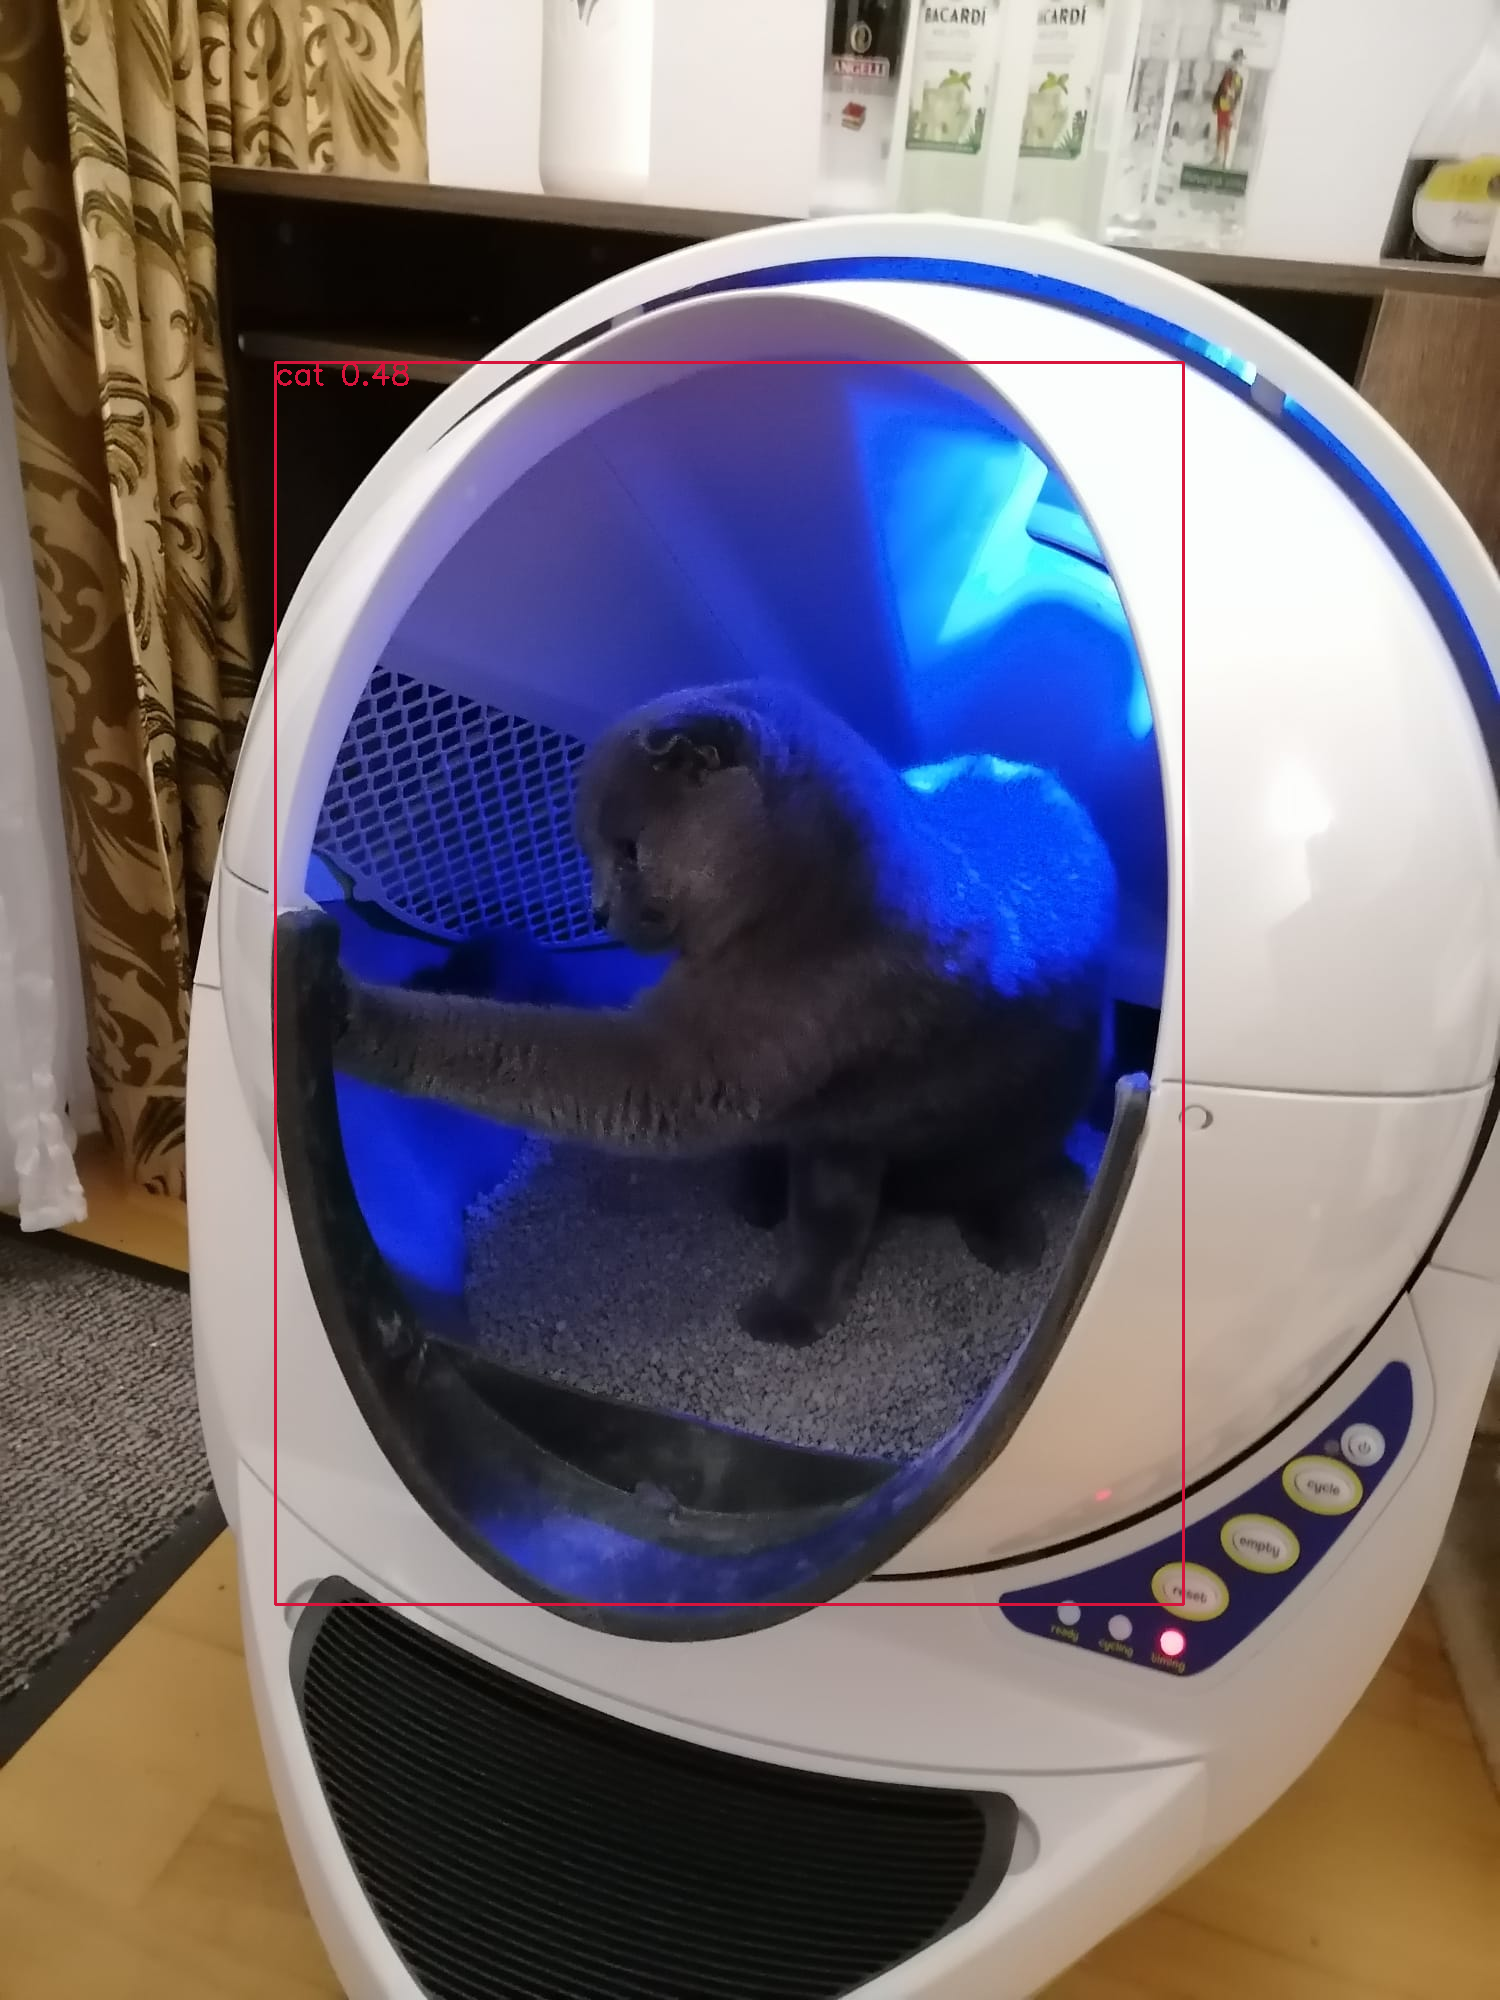

In [6]:
from PIL import Image

cat_image_path = '../resources/cat.png'
cat_image = Image.open(cat_image_path)
predicted = predictor.predict(cat_image)
predicted[0]['image']

In [7]:
def detect_objects(index):
    image = voc_test[index][0]
    predicted = predictor.predict(image)
    image_edited = predicted[0]['image']
    return image_edited

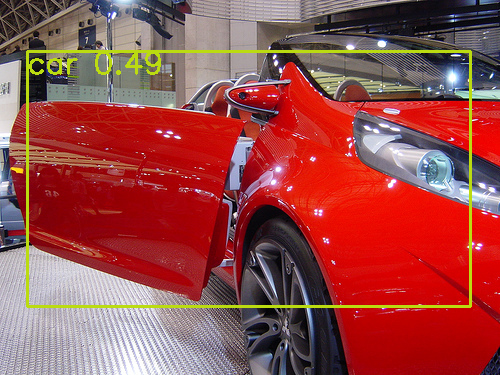

In [8]:
detect_objects(7)

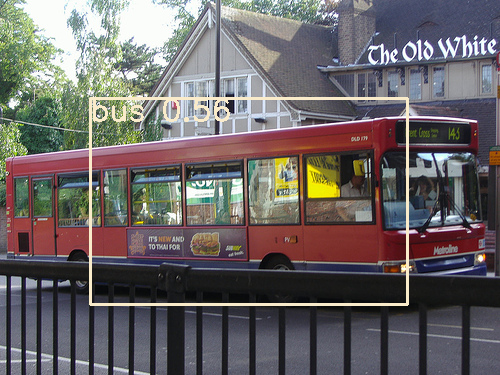

In [9]:
detect_objects(8)

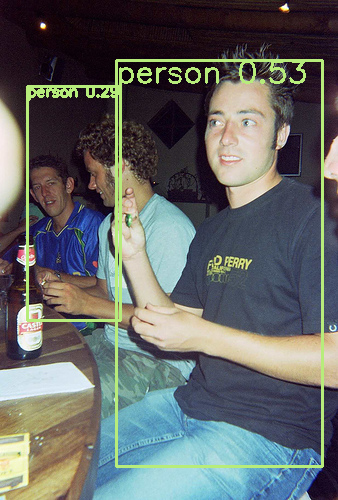

In [10]:
detect_objects(9)

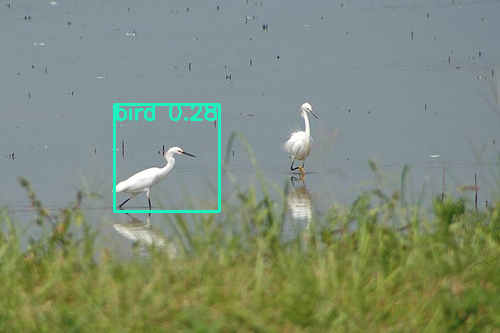

In [11]:
detect_objects(15)

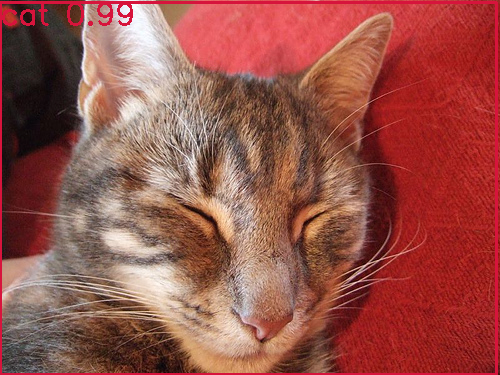

In [12]:
detect_objects(16)

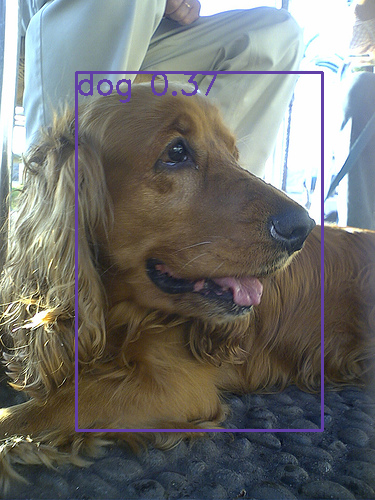

In [13]:
detect_objects(17)

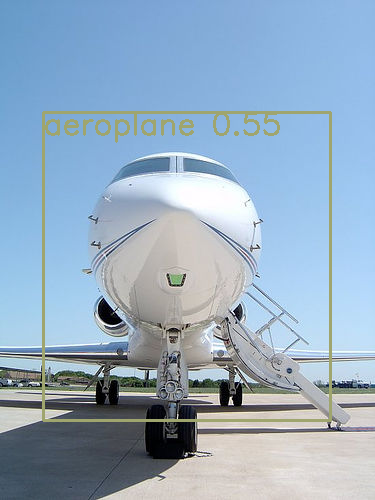

In [14]:
detect_objects(19)

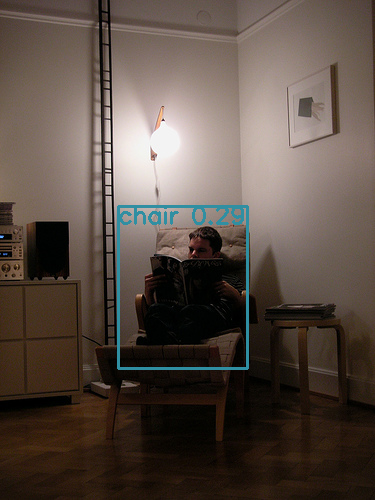

In [15]:
detect_objects(20)

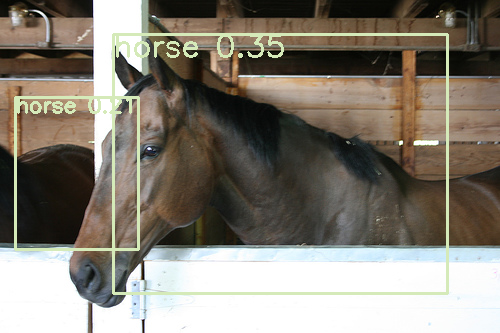

In [16]:
detect_objects(23)

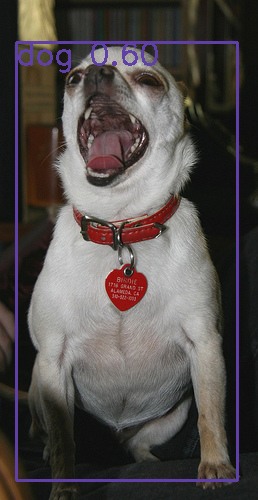

In [17]:
detect_objects(45)

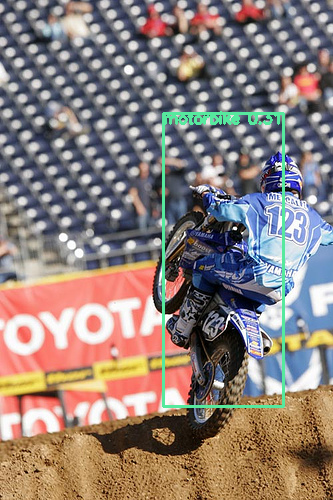

In [18]:
detect_objects(82)

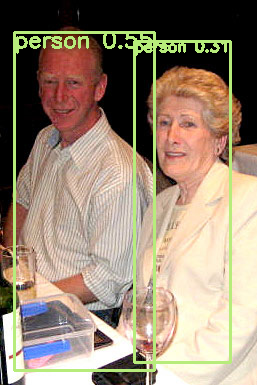

In [19]:
detect_objects(97)